In [1]:
# Customizing Plot Legends

import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

%matplotlib inline 
import numpy as np 

/tmp/ipykernel_440137/3609494177.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


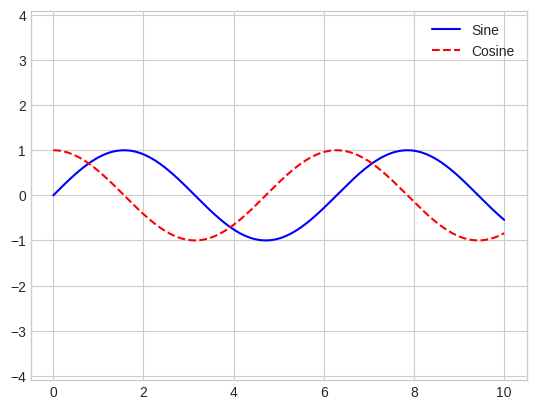

In [2]:
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()

ax.plot(x, np.sin(x), "-b", label="Sine")
ax.plot(x, np.cos(x), "--r", label="Cosine")
ax.axis("equal")
leg = ax.legend()

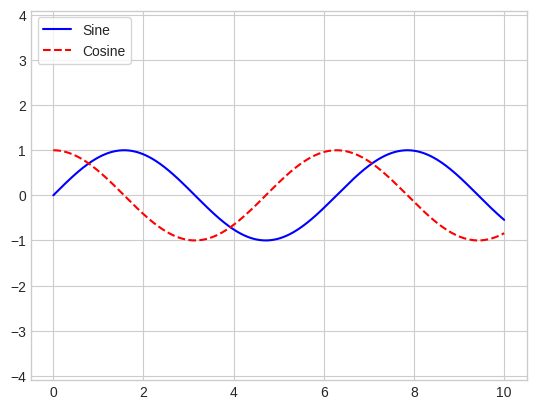

In [3]:
ax.legend(loc="upper left", frameon=True)
fig 

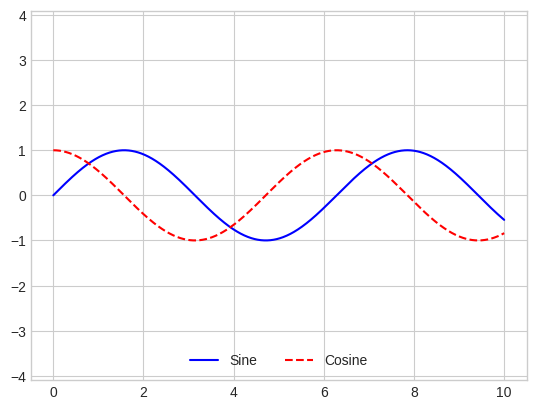

In [5]:
ax.legend(loc = "lower center", ncol=2)
fig 

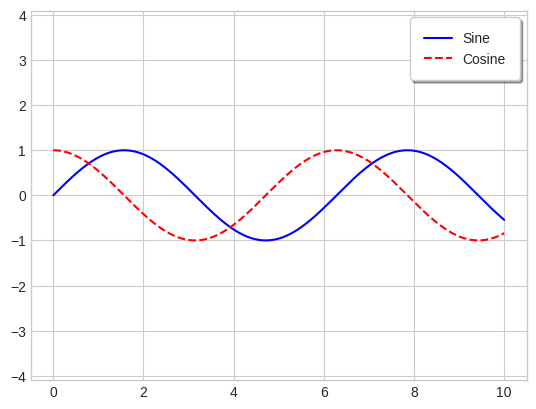

In [7]:
ax.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig 

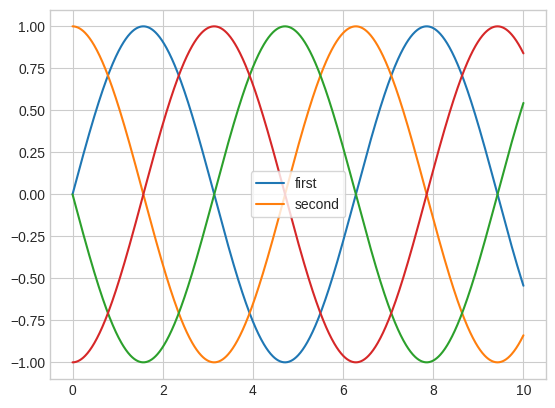

In [20]:
# Choosing Elements for the Legend 
y = np.sin(
    x[:,np.newaxis] + np.pi * np.arange(0,2,0.5)
)
lines = plt.plot(x,y)

# lines is a list of plt.line2D instances
plt.legend(
    lines[:2], ["first","second"], frameon=True
)

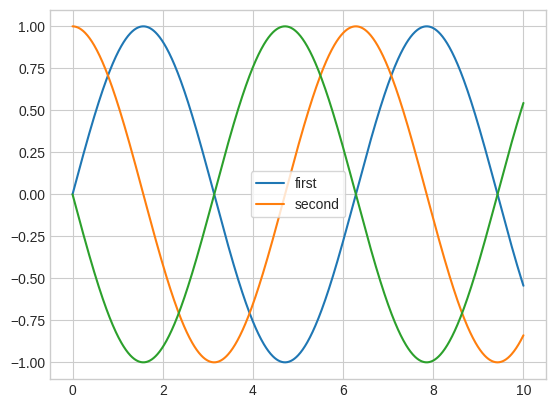

In [21]:
plt.plot(x, y[:,0], label="first")
plt.plot(x, y[:,1], label="second")
plt.plot(x, y[:,2])
plt.legend(frameon=True)

Text(0.5, 1.0, 'Cities')

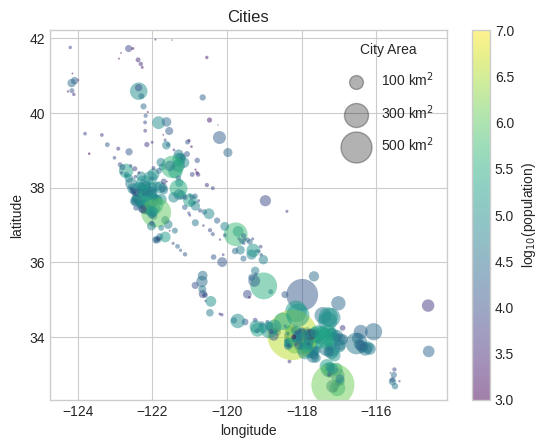

In [22]:
# legend for size of points 
import pandas as pd 
cities = pd.read_csv("/__PROJECTS/aa_CommonData/ml/california_cities.csv")

# extract the data we're interested in 
lat,lon = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

# scatter the points, using size and color but no label
plt.scatter(lon,lat, label=None, 
            c=np.log10(population), cmap="viridis",
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="log$_{10}$(population)")
plt.clim(3,7)

# here we create a legend:
# we'll plot empty lists with the desired size and label 
for area in [100,300,500]:
    plt.scatter([],[], c="k", alpha=0.3, s=area, 
                label=str(area) + " km$^2$")
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="City Area")

plt.title("Cities")

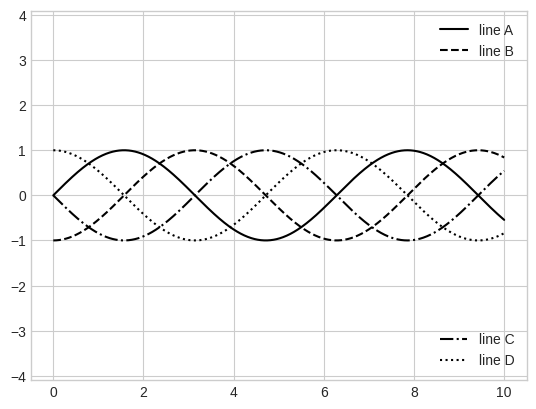

In [24]:
# Multiple Legends 
fig, ax = plt.subplots()

lines = []
styles = ["-","--","-.",":"]
x = np.linspace(0,10,1000)

for i in range(4):
    lines += ax.plot(
        x, 
        np.sin(x - i * np.pi / 2),
        styles[i],
        color="black"
    )

ax.axis("equal")

# specify the lines and labels of the first legend 
ax.legend(
    lines[:2],
    ["line A", "line B"],
    loc = "upper right"
)

# create the second legend and add the artist manually 
from matplotlib.legend import Legend 
leg = Legend(
    ax, 
    lines[2:],
    ["line C", "line D"],
    loc="lower right"
)

ax.add_artist(leg);